In [254]:
import itertools
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree


# Question 1

In [171]:
df = pd.read_csv('water_potability.csv')
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


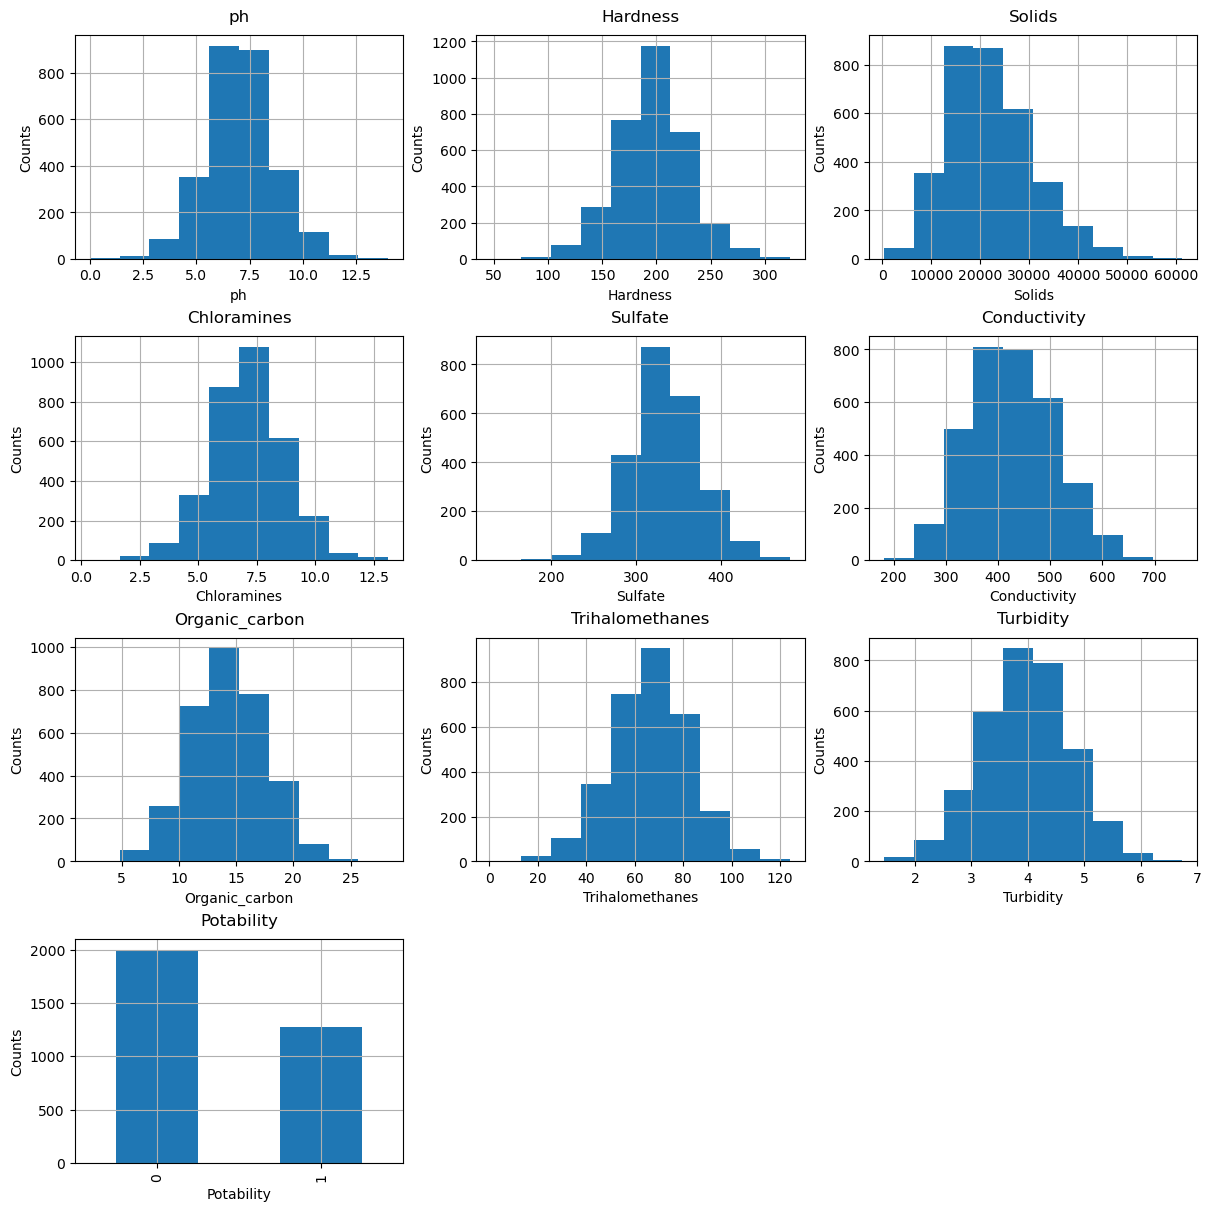

In [172]:
n_cols = len(df.columns)  # 10
cols_per_row = 3
n_rows = math.ceil(n_cols / cols_per_row)  # calculate rows needed for 3 columns per row
width_per_plot = 4
height_per_plot = 3
fig, axs = plt.subplots(n_rows, cols_per_row, figsize=(width_per_plot * cols_per_row, height_per_plot * n_rows),
                        constrained_layout=True)

# # Flatten axs for easier iteration (handles 1D or 2D array)
# axs = np.array(axs).flatten()

# Plot each column
for col in df.columns:
    axis_indexes = np.unravel_index(df.columns.get_loc(col), axs.shape)  # subplot index for column
    ax = axs[axis_indexes]
    ax.set_title(col, fontsize=12, pad=10)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Counts', fontsize=10)

    if col == 'Potability':
        df[col].value_counts().plot(kind='bar', ax=ax)
    else:
        df[col].hist(ax=ax)

    # Add a light grid for better readability
    ax.grid(True)

# hide empty plots (4x3 grid)
for i in range(n_cols, n_rows * cols_per_row):
    axis_indexes = np.unravel_index(i, axs.shape)
    axs[axis_indexes].set_visible(False)

plt.show()


In [173]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [174]:
df.isnull()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3271,False,False,False,False,False,False,False,False,False,False
3272,False,False,False,False,True,False,False,True,False,False
3273,False,False,False,False,True,False,False,False,False,False
3274,False,False,False,False,True,False,False,False,False,False


In [175]:
print("Missing values per feature")
df.isnull().sum()

Missing values per feature


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [176]:
# calculate percentage of potable non-potable water
potability_counts = df['Potability'].value_counts(normalize=True) * 100
potability_counts

Potability
0    60.989011
1    39.010989
Name: proportion, dtype: float64

In [177]:
print("Percentage of potable water: ", potability_counts.get(1, 0), "%")
print("Percentage of non-potable water: ", potability_counts.get(0, 0), "%")

Percentage of potable water:  39.010989010989015 %
Percentage of non-potable water:  60.98901098901099 %


In [178]:
df.isnull().sum() / df.shape[0] * 100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

Almost 1/4 of Sulfate, ~15% of ph and ~5% of Trihalomethanes values are missing. The rest of the features and the outcome have no missing values. The dataset quality is not very good due to the high percentage of missing values in ph and Sulfate. The positive is that the outcome variable 'Potability' has no missing values.

# Question 2

In [179]:
ph_u_65_pot_df = df[['ph', 'Potability']][df['ph'] < 6.5]
ph_u_65_pot_df.describe()

,ph,Potability
count,968.000000,968.000000
mean,5.435231,0.367769
std,0.922304,0.482447
min,0.000000,0.000000
25%,4.988966,0.000000
50%,5.665856,0.000000
75%,6.137377,1.000000
max,6.499068,1.000000


In [180]:
ph_65_to_85_pot_df = df[['ph', 'Potability']][df['ph'].between(6.5, 8.5)]
ph_65_to_85_pot_df.describe()

,ph,Potability
count,1328.000000,1328.000000
mean,7.408354,0.439006
std,0.552018,0.496453
min,6.503638,0.000000
25%,6.922500,0.000000
50%,7.376743,0.000000
75%,7.866354,1.000000
max,8.490572,1.000000


In [181]:
ph_o_85_pot_df = df[['ph', 'Potability']][df['ph'] > 8.5]
ph_o_85_pot_df.describe()

,ph,Potability
count,489.000000,489.000000
mean,9.448702,0.331288
std,0.839658,0.471159
min,8.501711,0.000000
25%,8.828094,0.000000
50%,9.239440,0.000000
75%,9.879071,1.000000
max,14.000000,1.000000


In [182]:
potable_percentage_ph_u_65 = ph_u_65_pot_df['Potability'].eq(1).sum() / ph_u_65_pot_df.shape[0] * 100
non_potable_percentage_ph_u_65 = ph_u_65_pot_df['Potability'].eq(0).sum() / ph_u_65_pot_df.shape[0] * 100
potable_percentage_ph_65_to_85 = ph_65_to_85_pot_df['Potability'].eq(1).sum() / ph_65_to_85_pot_df.shape[0] * 100
non_potable_percentage_ph_65_to_85 = ph_65_to_85_pot_df['Potability'].eq(0).sum() / ph_65_to_85_pot_df.shape[0] * 100
potable_percentage_ph_o_85 = ph_o_85_pot_df['Potability'].eq(1).sum() / ph_o_85_pot_df.shape[0] * 100
non_potable_percentage_ph_o_85 = ph_o_85_pot_df['Potability'].eq(0).sum() / ph_o_85_pot_df.shape[0] * 100
print("Percentage of potable water with ph < 6.5: ", potable_percentage_ph_u_65, "%")
print("Percentage of non-potable water with ph < 6.5: ", non_potable_percentage_ph_u_65, "%")
print("Percentage of potable water with 6.5 <= ph <= 8.5: ", potable_percentage_ph_65_to_85, "%")
print("Percentage of non-potable water with 6.5 <= ph <= 8.5: ", non_potable_percentage_ph_65_to_85, "%")
print("Percentage of potable water with ph > 8.5: ", potable_percentage_ph_o_85, "%")
print("Percentage of non-potable water with ph > 8.5: ", non_potable_percentage_ph_o_85, "%")

Percentage of potable water with ph < 6.5:  36.77685950413223 %
Percentage of non-potable water with ph < 6.5:  63.22314049586777 %
Percentage of potable water with 6.5 <= ph <= 8.5:  43.90060240963856 %
Percentage of non-potable water with 6.5 <= ph <= 8.5:  56.09939759036144 %
Percentage of potable water with ph > 8.5:  33.12883435582822 %
Percentage of non-potable water with ph > 8.5:  66.87116564417178 %


For pH:
- <6.5: 36.78% potable, 63.22% non-potable, data aligns with WHO suggestions
- 6.5-8.5: 43.90% potable, 56.10% non-potable, data partially aligns with WHO suggestions (larger percentage of potable water in comparison to the other ranges)
- \>8.5: 33.13% potable, 66.87% non-potable, data aligns with WHO suggestions

# Question 3

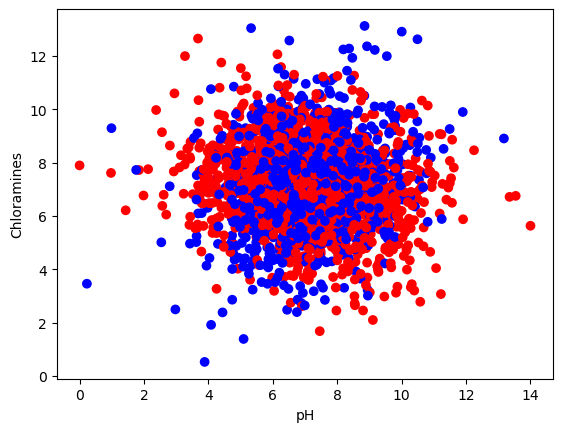

In [183]:
ph_chlor_pot_df = df[['ph', 'Chloramines', 'Potability']].copy()
ph_chlor_pot_df.loc[:, 'color'] = ph_chlor_pot_df['Potability'].map({1: 'blue', 0: 'red'})
plt.xlabel('pH')
plt.ylabel('Chloramines')
plt.scatter(ph_chlor_pot_df['ph'], ph_chlor_pot_df['Chloramines'],
            c=ph_chlor_pot_df['color'])

Scatter plot of potability based on pH and Chloramines shows no clear separation between potable and non-potable water. Also, there isn't a clear separation between potable and non-potable water based on WHO Chloramines guidelines (max 4ppm) and the most amount of data is above that limit.

In [184]:
over4ppm_percentage = ph_chlor_pot_df[ph_chlor_pot_df['Chloramines'] > 4].shape[0] / ph_chlor_pot_df.shape[0] * 100
print(f"Percentage of samples with Chloramines > 4ppm: {over4ppm_percentage}%")

Percentage of samples with Chloramines > 4ppm: 97.28327228327228%


# Question 4

In [185]:
print(f"Sulfate zeros percentage: {df['Sulfate'].notnull().eq(0).sum() / df.shape[0] * 100}%")
print(f"Sulfate mean: {df['Sulfate'].mean()}")

print(f"Trihalomethanes zeros percentage: {df['Trihalomethanes'].notnull().eq(0).sum() / df.shape[0] * 100}%")
print(f"Trihalomethanes mean: {df['Trihalomethanes'].mean()}")

Sulfate zeros percentage: 23.84004884004884%
Sulfate mean: 333.77577661081347
Trihalomethanes zeros percentage: 4.945054945054945%
Trihalomethanes mean: 66.39629294676803


In [186]:
df['ph'] = df['ph'].fillna(df['ph'].mean())  # ph 0 doesnt make sense
df['Sulfate'] = df['Sulfate'].fillna(
    df['Sulfate'].mean())  # sulfate existing values follow normal distribution around 333
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(
    df['Trihalomethanes'].mean())  # trihalomethanes existing values follow normal distribution around 66

# Question 5

In [187]:
x = df.drop(columns=['Potability']).to_numpy()
y = df['Potability'].to_numpy()
seed = 0
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=seed)

# Question 6

In [194]:
model = DecisionTreeClassifier(random_state=seed)
model.fit(x_train, y_train)

accuracy = model.score(x_test, y_test) * 100
print(f"Decision Tree Classifier accuracy: {accuracy}%")

Decision Tree Classifier accuracy: 57.47711088504578%


# Question 7

In [227]:
params_combinations_dict = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt'],
    'ccp_alpha': [0, 0.01]
}

param_names = list(params_combinations_dict.keys())
combination_values_list = list(itertools.product(*params_combinations_dict.values()))
# list of all combinations as dicts ready to use in DecisionTreeClassifier
params_combinations_dict_list = [
    dict(zip(param_names, combination))
    for combination in combination_values_list
]
results7 = []

for params in params_combinations_dict_list:
    model7 = DecisionTreeClassifier(random_state=seed, **params)
    model7.fit(x_train, y_train)
    accuracy_test7 = model7.score(x_test, y_test) * 100
    accuracy_train7 = model7.score(x_train, y_train) * 100
    results7.append({**params, **{'train_accuracy': accuracy_train7, 'test_accuracy': accuracy_test7}})

results7_df = pd.DataFrame(results7)
results7_df = results7_df.sort_values(by='test_accuracy', ascending=False)
results7_df.head(10)

,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,ccp_alpha,train_accuracy,test_accuracy
92,entropy,5.0,5,2,None,0.0,67.117314,65.513733
84,entropy,5.0,2,2,None,0.0,67.117314,65.513733
88,entropy,5.0,5,1,None,0.0,67.160925,65.412004
80,entropy,5.0,2,1,None,0.0,67.160925,65.412004
36,gini,5.0,2,2,None,0.0,66.201483,64.394710
44,gini,5.0,5,2,None,0.0,66.201483,64.292981
40,gini,5.0,5,1,None,0.0,66.201483,64.191251
32,gini,5.0,2,1,None,0.0,66.288705,64.191251
76,entropy,3.0,5,2,None,0.0,64.108155,63.987792
68,entropy,3.0,2,2,None,0.0,64.108155,63.987792


# Question 8

Params with highest test accuracy:
criterion              entropy
max_depth                  3.0
min_samples_split            5
min_samples_leaf             2
max_features              None
ccp_alpha                  0.0
train_accuracy       64.108155
test_accuracy        63.987792
Name: 76, dtype: object


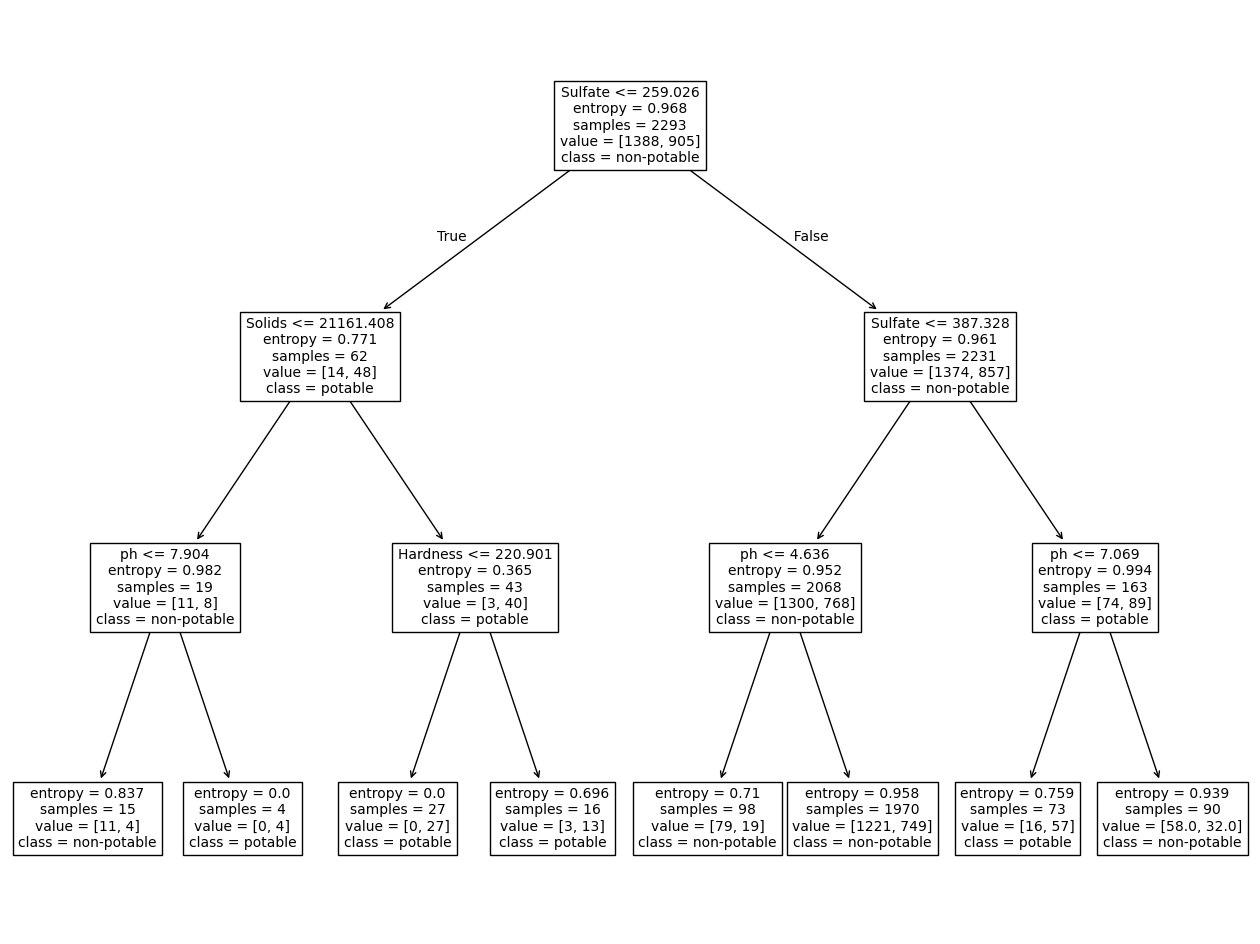

In [274]:
results8_df = results7_df.copy()[results7_df['max_depth'].eq(3.0)].sort_values(by='test_accuracy', ascending=False)
print("Params with highest test accuracy:")
print(results8_df.iloc[0])

model8 = DecisionTreeClassifier(random_state=seed,
                                criterion=results8_df.iloc[0]['criterion'],
                                max_depth=int(results8_df.iloc[0]['max_depth']),
                                min_samples_split=int(results8_df.iloc[0]['min_samples_split']),
                                min_samples_leaf=int(results8_df.iloc[0]['min_samples_leaf']),
                                max_features=results8_df.iloc[0]['max_features'],
                                ccp_alpha=results8_df.iloc[0]['ccp_alpha'])
model8.fit(x_train, y_train)
plt.figure(figsize=(16, 12))
plot_tree(model8, feature_names=df.columns[:-1], class_names=['non-potable', 'potable'], fontsize=10)
plt.show()


## Rules

### Potable water:
1. Sulfate <= 259.026 and Solids > 21161.408
2. Sulfate <= 259.026 and Solids <= 21161.408 and pH > 7.904
3. Sulfate > 387.328 and pH <= 7.069

### Non-potable water:
1. 259.026 < Sulfate <= 387.328
2. Sulfate > 387.328 and pH > 7.069
3. Sulfate <= 259.026 and Solids <= 21161.408 and pH <= 7.904